<div style="color:white;background:black;height:40px; width:90vw;font-weight:bold;font-size:35px; text-align:center;margin-bottom:15px;padding-top:13px;border-radius:10px;">Heart Disease</div>

<img src="https://etimg.etb2bimg.com/photo/94525669.cms" alt="Alt Text" width="600" height="400">

<div  style="color:white; background:black; height:40px; width:90vw; font-weight:bold;  text-align:center; margin-top:20px; padding-top:13px; border-radius:10px; "><a style="color:blue; text-decoration:none;" href="https://health.economictimes.indiatimes.com/news/industry/indians-have-predisposition-for-heart-disease-and-it-occurs-in-them-at-younger-age/94525638" target="_blank" >Image source</a></div>



# 0.Introduction
<p>Heart disease is a general term that includes many types of heart problems. It's also called cardiovascular disease, which means heart and blood vessel disease.There are many different types of heart disease. Some you may be born with, called congenital heart disease. Other types develop during your lifetime.The causes of heart disease depend on the type of disease. Some possible causes include lifestyle, genetics, infections, medicines, and other diseases.</p>

<p>There are many different factors that can make you more likely to develop heart disease. Some of these factors you can change, but others you cannot.</p> 

* Age
* Sex 
* Race/ethnicity 
* Lifestyle habits
* High blood pressure
* High cholesterol levels
* Diabetes
* Obesity
* Autoimmune and inflammatory diseases
* Chronic kidney disease
* Metabolic syndrome

[source](https://medlineplus.gov/heartdiseases.html#:~:text=What%20is%20heart%20disease%3F,many%20types%20of%20heart%20disease.)

### Objective:
* To do EDA on the dataset of heart disease.
* To find the age group in which heart disease is more common.

# Table of content
* 0.Introduction
* 1.Exploratory Data Analysis [EDA]
    * 1.1 Data Dictonary
    * 1.2 Data Pre processing
    * 1.3 Exploring Features
    * 1.4 Graphs   
        * 1.4.1 Lineplot
        * 1.4.2 Barplot
        * 1.4.3 Boxplot

    * 1.5 Correlation Heatmap
* 2. Findings
* 3. Reference

# 1.Exploratory Data Analysis



In [1]:
#Import necessary library functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\DELL\data_science_with_maladeep\Assignment\4.dashain_project\heart_disease\heart.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* There is no Null data in the data set.
* One of the feature has float value but all other has integer value.

## 1.1 Data Dictionary

1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina

    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping

    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = error (in the original dataset 0 maps to NaN's)
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease
 

## 1.2 Data pre-processing

In [4]:
count=df.isnull().sum()
print(count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


* this conclude that ther is no null data in the data set

In [5]:
count=(df['thal']==0).sum()
print(count)

2


* We have 2 data with the value of thal=0 which is not a required value so it will be removed using ostrich theorem .

In [6]:
count=(df['ca']==4).sum()
print(count)

5


* We have 5 data with the value of ca=4 which is not a required value so it will be removed using ostrich theorem .

In [7]:
mask=~df["thal"].isin([1,2,3])
print(df[mask])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0      115      0      0.0   
281   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0  


In [8]:
mask=~df['ca'].isin([0,1,2,3])
print(df[mask])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   

     slope  ca  thal  target  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0  


In [9]:
df=df[df["ca"]<4]
df=df[df["thal"]>0]
print(len(df))

296


* Data with ca=4 and thal=0 are removed using ostrich theorem.

### 1.2.1 Columns Renaming


In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df=df.rename(
    columns={'cp':'chest_pain_type',
              'trestbps':'resting_blood_pressure',
            'chol':'cholesterol',
            'fbs':'fasting_blood_sugar',
            'restecg':'resting_electrocardiogram',
            'thalach':'max_heart_rate_achieved',
            'exang':'exercise_induced_angina',
            'oldpeak':"depression",
             'slope':'st_slope',
             'ca':'num_major_vessels',
             'thal':'thalassemia'
            },
    errors="raise")

In [12]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [13]:
df['sex']=df['sex'].map({1:'male',0:'female'})

df['chest_pain_type']=df['chest_pain_type'].map({0:'typical angina',
                                                 1:'atypical angina',
                                                 2:'non-anginal pain',
                                                 3:'asymptomatic'})

df['fasting_blood_sugar']=df['fasting_blood_sugar'].map({0:'lower than 120mg/ml',
                                                         1:'greater than 120mg/ml'})

df['resting_electrocardiogram']=df['resting_electrocardiogram'].map({0:'normal',
                                                                     1:'ST-T wave abnormality',
                                                                     2:'left ventricular hypertrophy'})

df['exercise_induced_angina']=df['exercise_induced_angina'].map({0:'no',1:'yes'})

df['st_slope']=df['st_slope'].map({0:'unsloping',
                                   1:'flar',
                                   2:'downsloping'})

df['thalassemia']=df['thalassemia'].map({1:'fixed_defect',
                                         2:'normal',
                                         3:'reversable defect'})

df['target']=df['target'].map({0:'no',1:'yes'})

In [14]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,unsloping,0,fixed_defect,yes
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,unsloping,0,normal,yes
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,yes
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,yes
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,yes


## 1.3 Exploring features
### 1.3.1 Target distribution

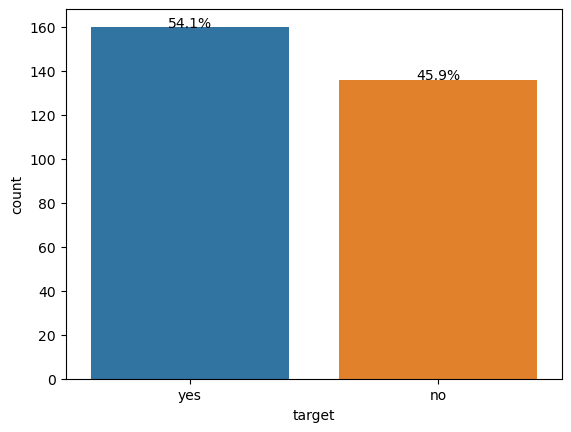

In [15]:
ax=sns.countplot(data=df,x='target')
total=len(df['target'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

* Data is equally distributed in term of target with 54.1% has heart disease and 45.9% doesnot have heart disease.

### 1.3.2 Sex distribution

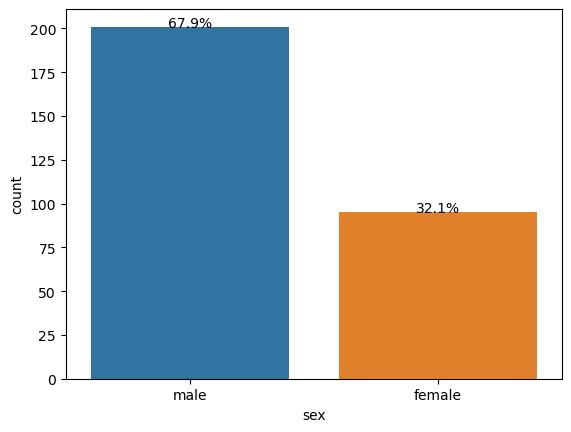

In [16]:
ax=sns.countplot(data=df,x='sex')
total=len(df['sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

* The dataset exhibits an imbalance in gender representation, characterized by a higher numerical prevalence of male instances compared to their female counterparts, thereby indicating a non-uniform distribution of data.

###  1.3.3 Numerical distribution


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


* Age 
    * The data ranges from the age group of 29 to 77.
    * there are more data with  age 50 to 60.
* Resting Blood Pressure
    *  max is 200, min is 94 and mean is 131.60
* Cholesterol
    * max is 564, min is 126, mean is 247.155
* Maximum heart rate achieved 
    * max is 202 and min is 71.
* Depression
    * max is 6.2 and min is 0 and mean is 1.059
* Number of major vessels
    * max is 3 and min is 0 

## 1.4 Graphs


In [18]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

### 1.4.1 Histogram

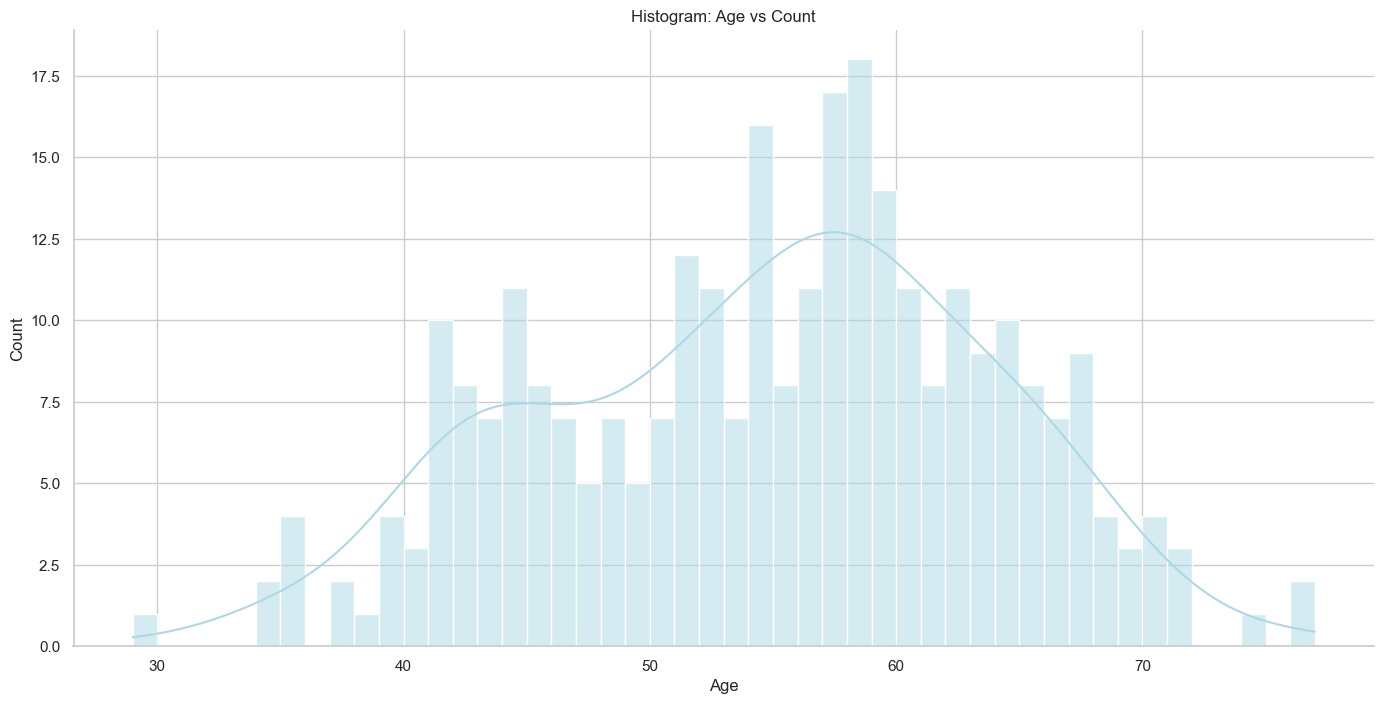

In [19]:
# setting the background to white grid
sns.set(style="whitegrid")

# creating a histogram using displot
sns.displot(data=df,x="age",binwidth=1, kind="hist", kde='True',color="lightblue",height=7,aspect=2)

#adding label and title
plt.title("Histogram: Age vs Count")
plt.xlabel("Age")
plt.ylabel("Count")

# show the plot
plt.show()

* more number of data are of age group 50 to 65.
* there are very less number of data with age group 30 to 40 and above 70.


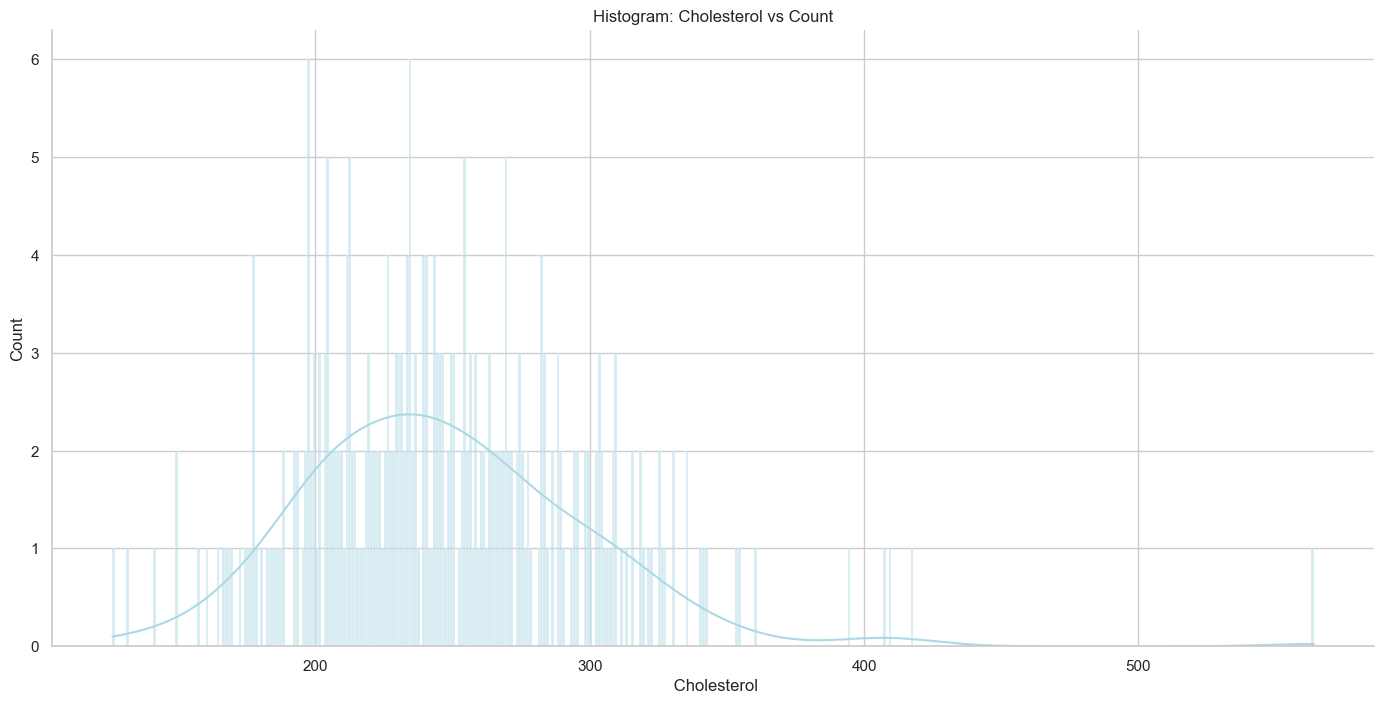

In [20]:
# creating a histogram using displot
sns.displot(data=df,x="cholesterol",binwidth=1, kind="hist", kde='True',color="lightblue",height=7,aspect=2)

#adding label and title
plt.title("Histogram: Cholesterol vs Count")
plt.xlabel(" Cholesterol")
plt.ylabel("Count")

# show the plot
plt.show()

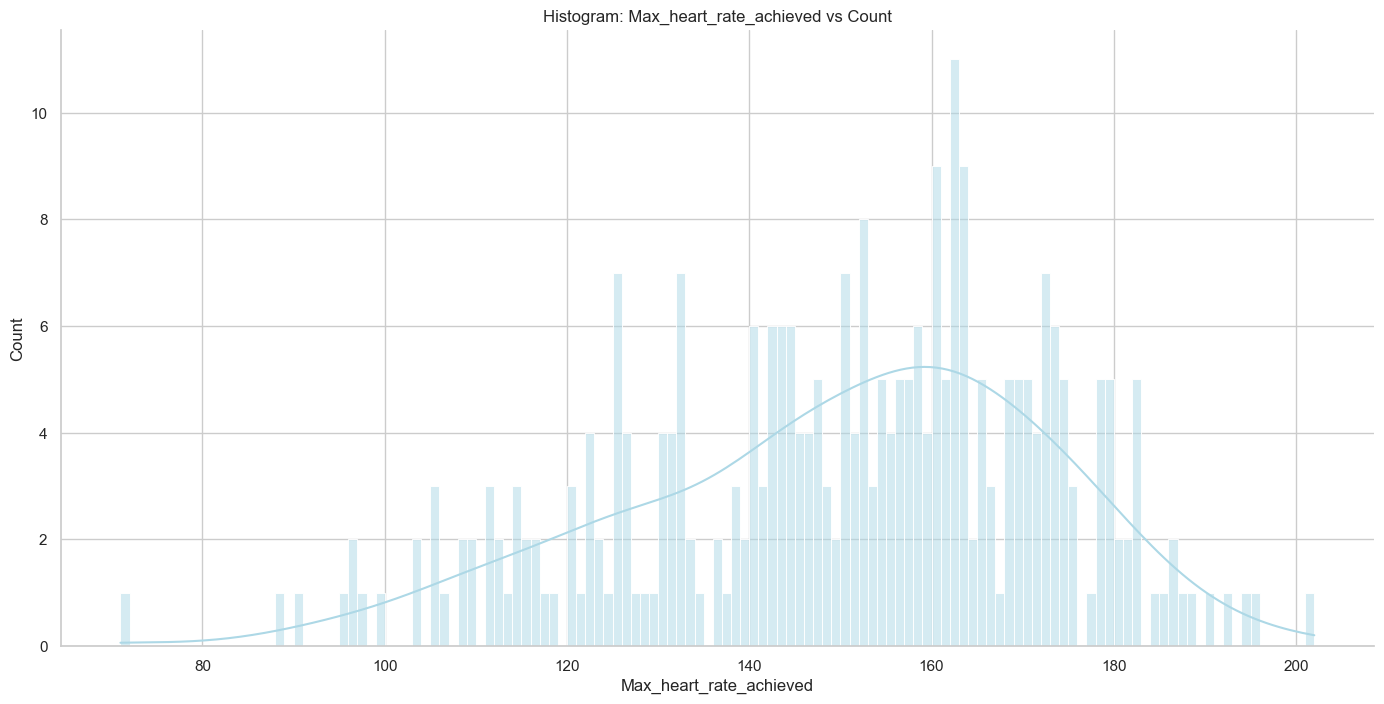

In [21]:
# creating a histogram using displot
sns.displot(data=df,x="max_heart_rate_achieved",binwidth=1, kind="hist", kde='True',color="lightblue",height=7,aspect=2)

#adding label and title
plt.title("Histogram: Max_heart_rate_achieved vs Count")
plt.xlabel("Max_heart_rate_achieved")
plt.ylabel("Count")

# show the plot
plt.show()

### 1.4.2 Lineplot

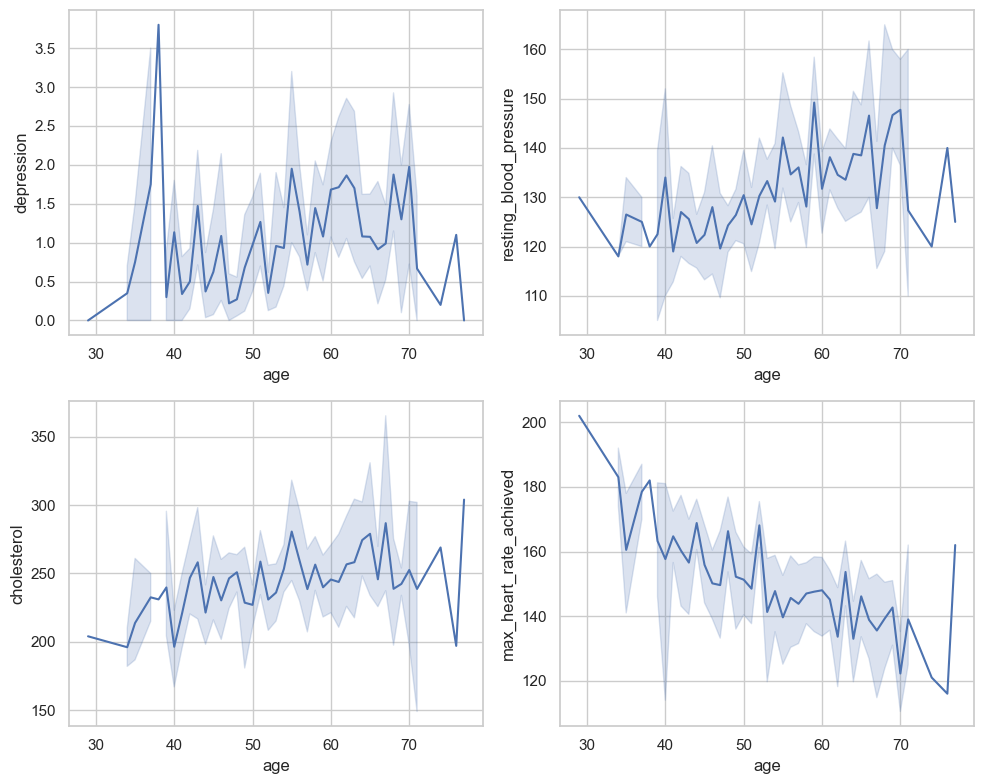

In [22]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
sns.lineplot(x="age", y="depression", data=df, ax=axes[0, 0])
sns.lineplot(x="age", y="resting_blood_pressure", data=df, ax=axes[0, 1])
sns.lineplot(x="age", y="cholesterol", data=df, ax=axes[1, 0])
sns.lineplot(x="age", y="max_heart_rate_achieved", data=df, ax=axes[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* Graph 1:    
    * depression is maximum in age group about 37.
    * depression is less in the age group 40  to 55. and above 70.
* Graph 2:
    * resting blood pressure is higher in higher age group and lower in lower age group.
* Graph 3:
    * cholesterol is from the range 200 to 300 for all data.
* Graph 4:
    * heart rate is maximum in lower age group and minimum in higher age group.


### 1.4.3 ScatterPlot

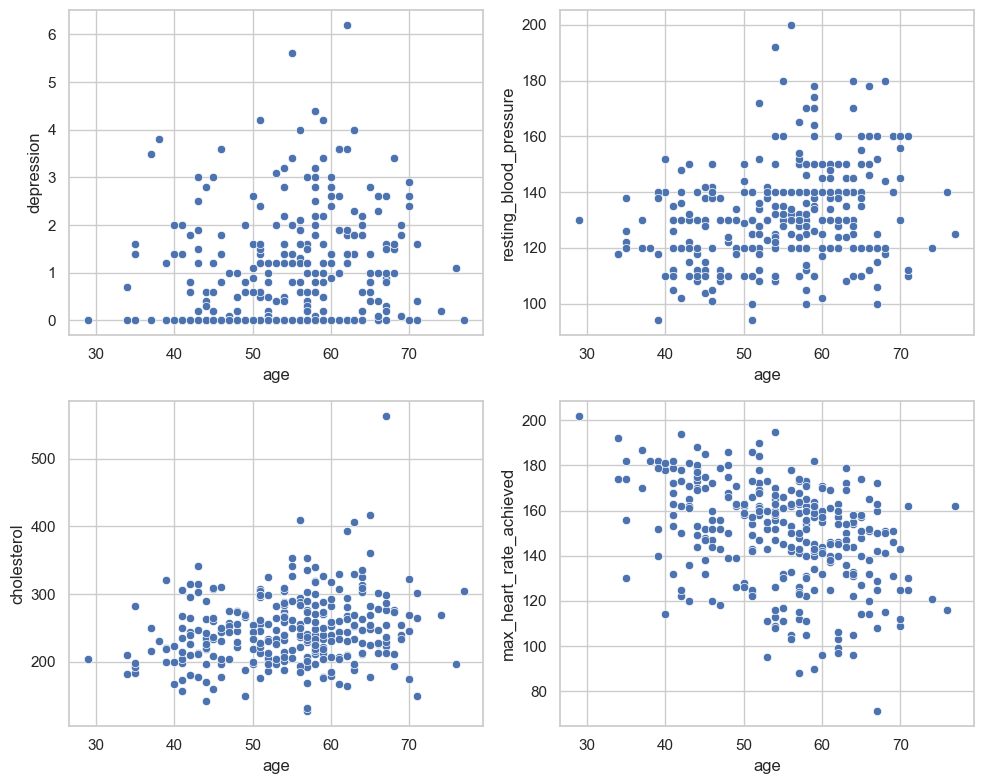

In [23]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
sns.scatterplot(x="age", y="depression", data=df, ax=axes[0, 0])
sns.scatterplot(x="age", y="resting_blood_pressure", data=df, ax=axes[0, 1])
sns.scatterplot(x="age", y="cholesterol", data=df, ax=axes[1, 0])
sns.scatterplot(x="age", y="max_heart_rate_achieved", data=df, ax=axes[1, 1])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* Graph 1:    
    * depression for age group 50 to 60 ranges from 0 to 2 more commonly.
* Graph 2:
    * resting blood pressure of 140 to 180 is more common.
* Graph 3:
    * cholesterol is from the range 200 to 300 for maximum data.
* Graph 4:
    * with increse of age heart rate is seems to be decreased.


### 1.4.4 Count plot

<Axes: xlabel='age', ylabel='count'>

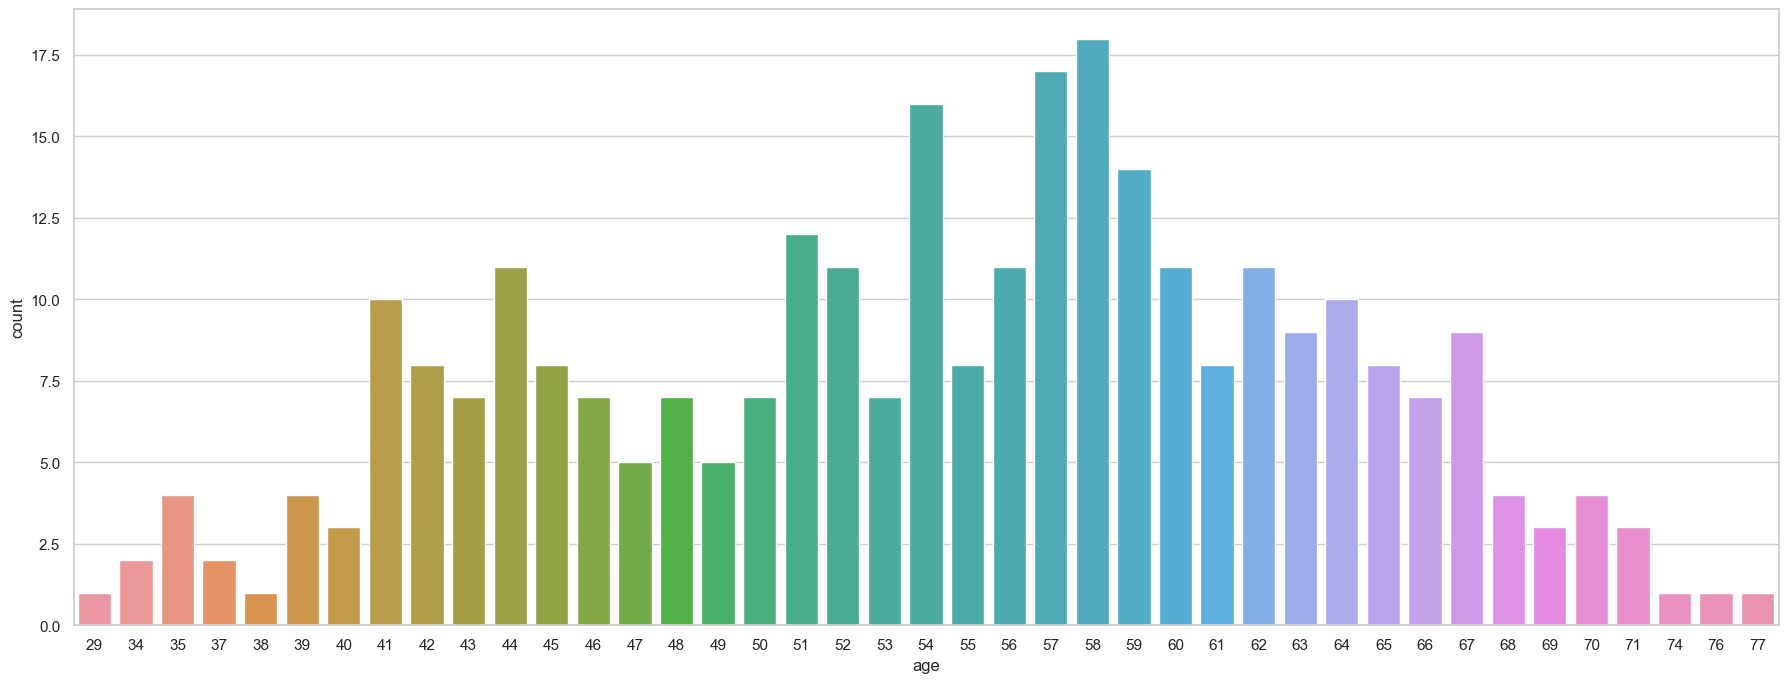

In [29]:
plt.figure(figsize=(22, 8))
sns.countplot(data=df,x="age")

* The number of data is less of age group less than 40 and more than 70 .
* The number of data id more of age group 50 to 65.

<Axes: xlabel='age', ylabel='count'>

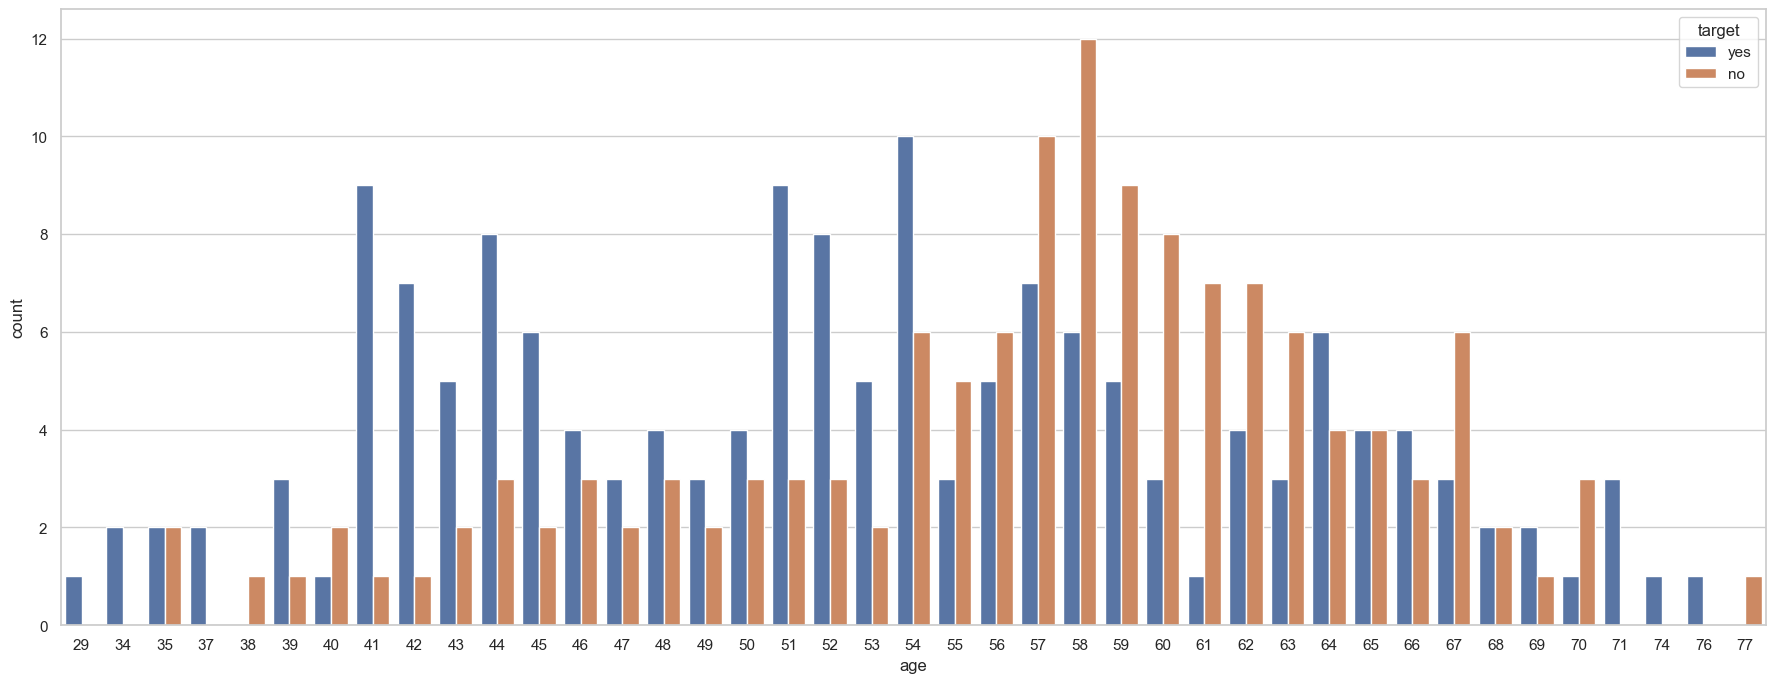

In [25]:
plt.figure(figsize=(22, 8))
sns.countplot(data=df,x="age", hue="target")

* from the age group 40 to 54, there are more number of data with heart disease. 
* from the age group 56 to 67, heart disease is less common . there are less number of people with no heart disease.

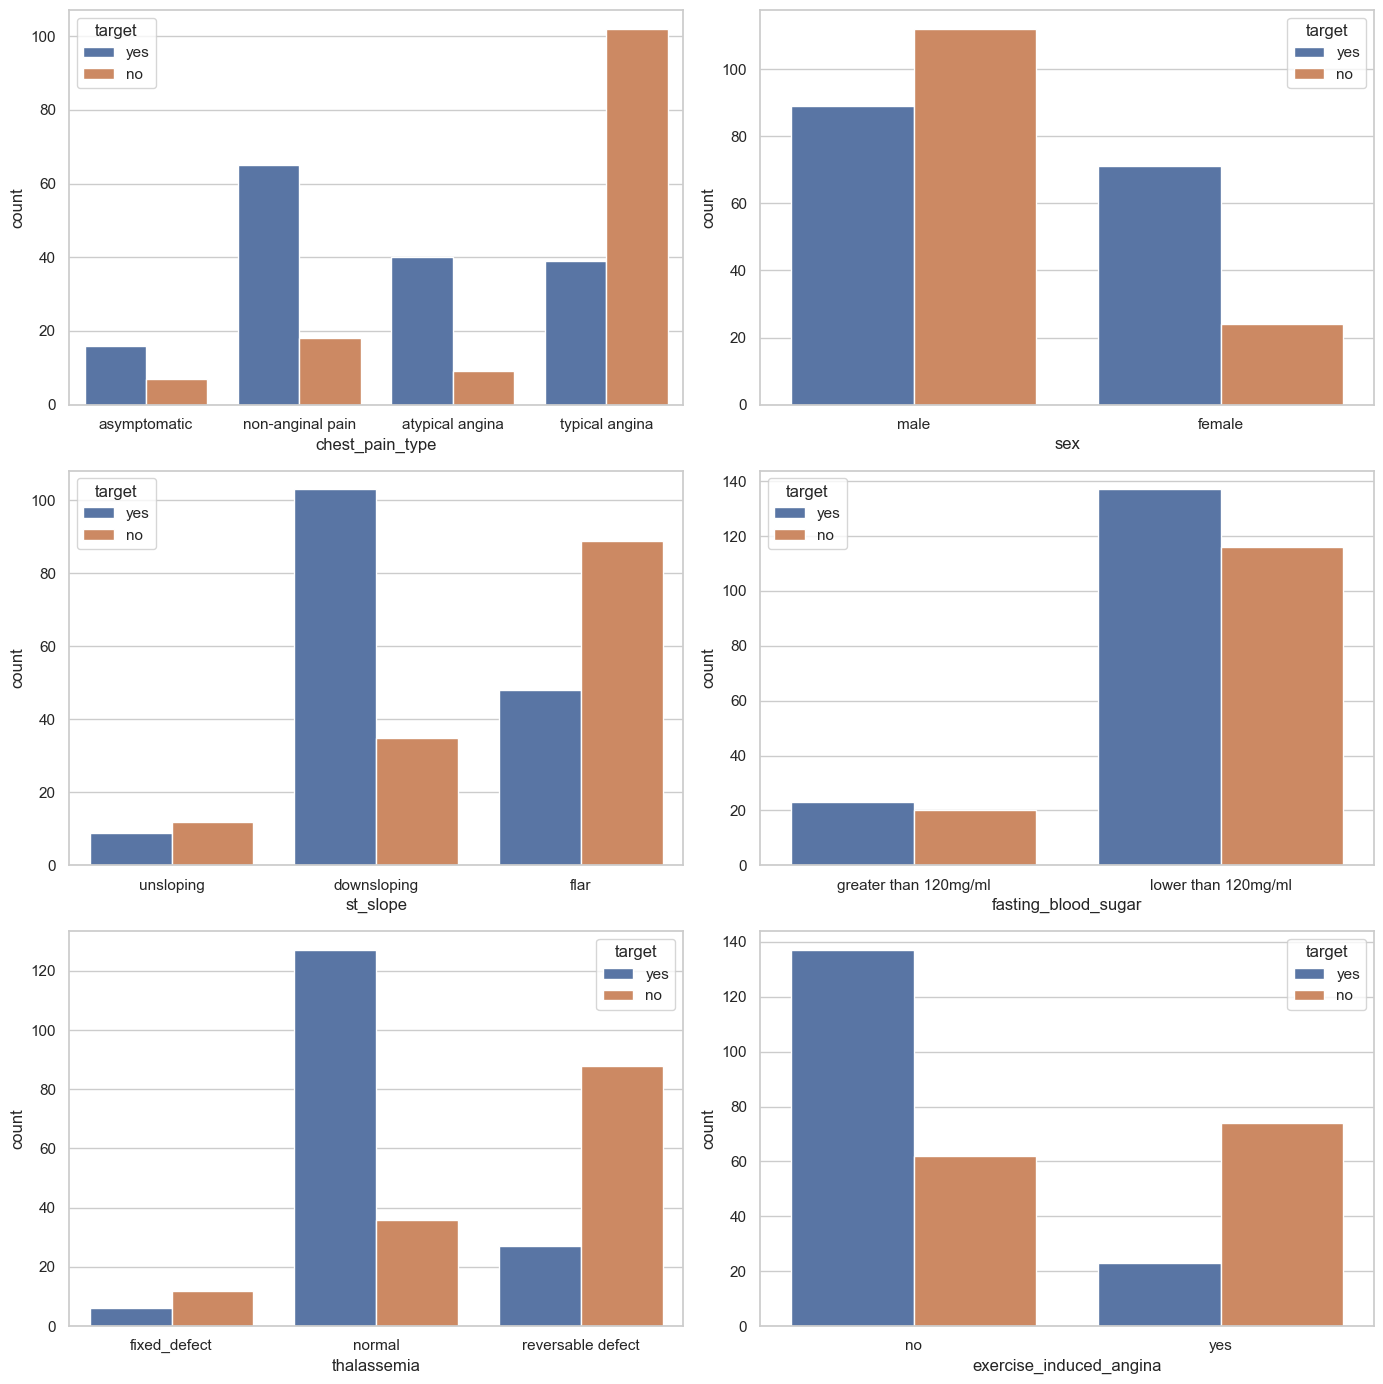

In [32]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plot on each subplot
sns.countplot( x="chest_pain_type",hue="target", data=df, ax=axes[0, 0])
sns.countplot(x="sex", data=df,hue="target", ax=axes[0, 1])
sns.countplot(x="st_slope", data=df,hue="target", ax=axes[1, 0])
sns.countplot(x="fasting_blood_sugar", data=df,hue="target", ax=axes[1, 1])
sns.countplot(x="thalassemia", data=df,hue="target", ax=axes[2, 0])
sns.countplot(x="exercise_induced_angina", data=df,hue="target", ax=axes[2, 1])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* Graph 1:    
    * people with typical angina type of chest pain are less commonly found to have heart disease.
    * people with asymptomatic, non-anginal pain and atypical angina type of chest pain are more comomonly suffed from heart         disease
* Graph 2:
    * Females are more commonly suffered from heart disease than that of male.
* Graph 3:
    * People with downsloping st_slope are more commonly found to be having heart disease.
* Graph 4:
    * fasting blood sugar has not shown any differnece in target .
* Graph 5:
    * more number of cases of heart disease are of normal thalassemia.
* Graph 6:
    * People with no exercise induced angina are more coomly found to be having heart disease.

## 1.5 Pearson Correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_1100\1262373191.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


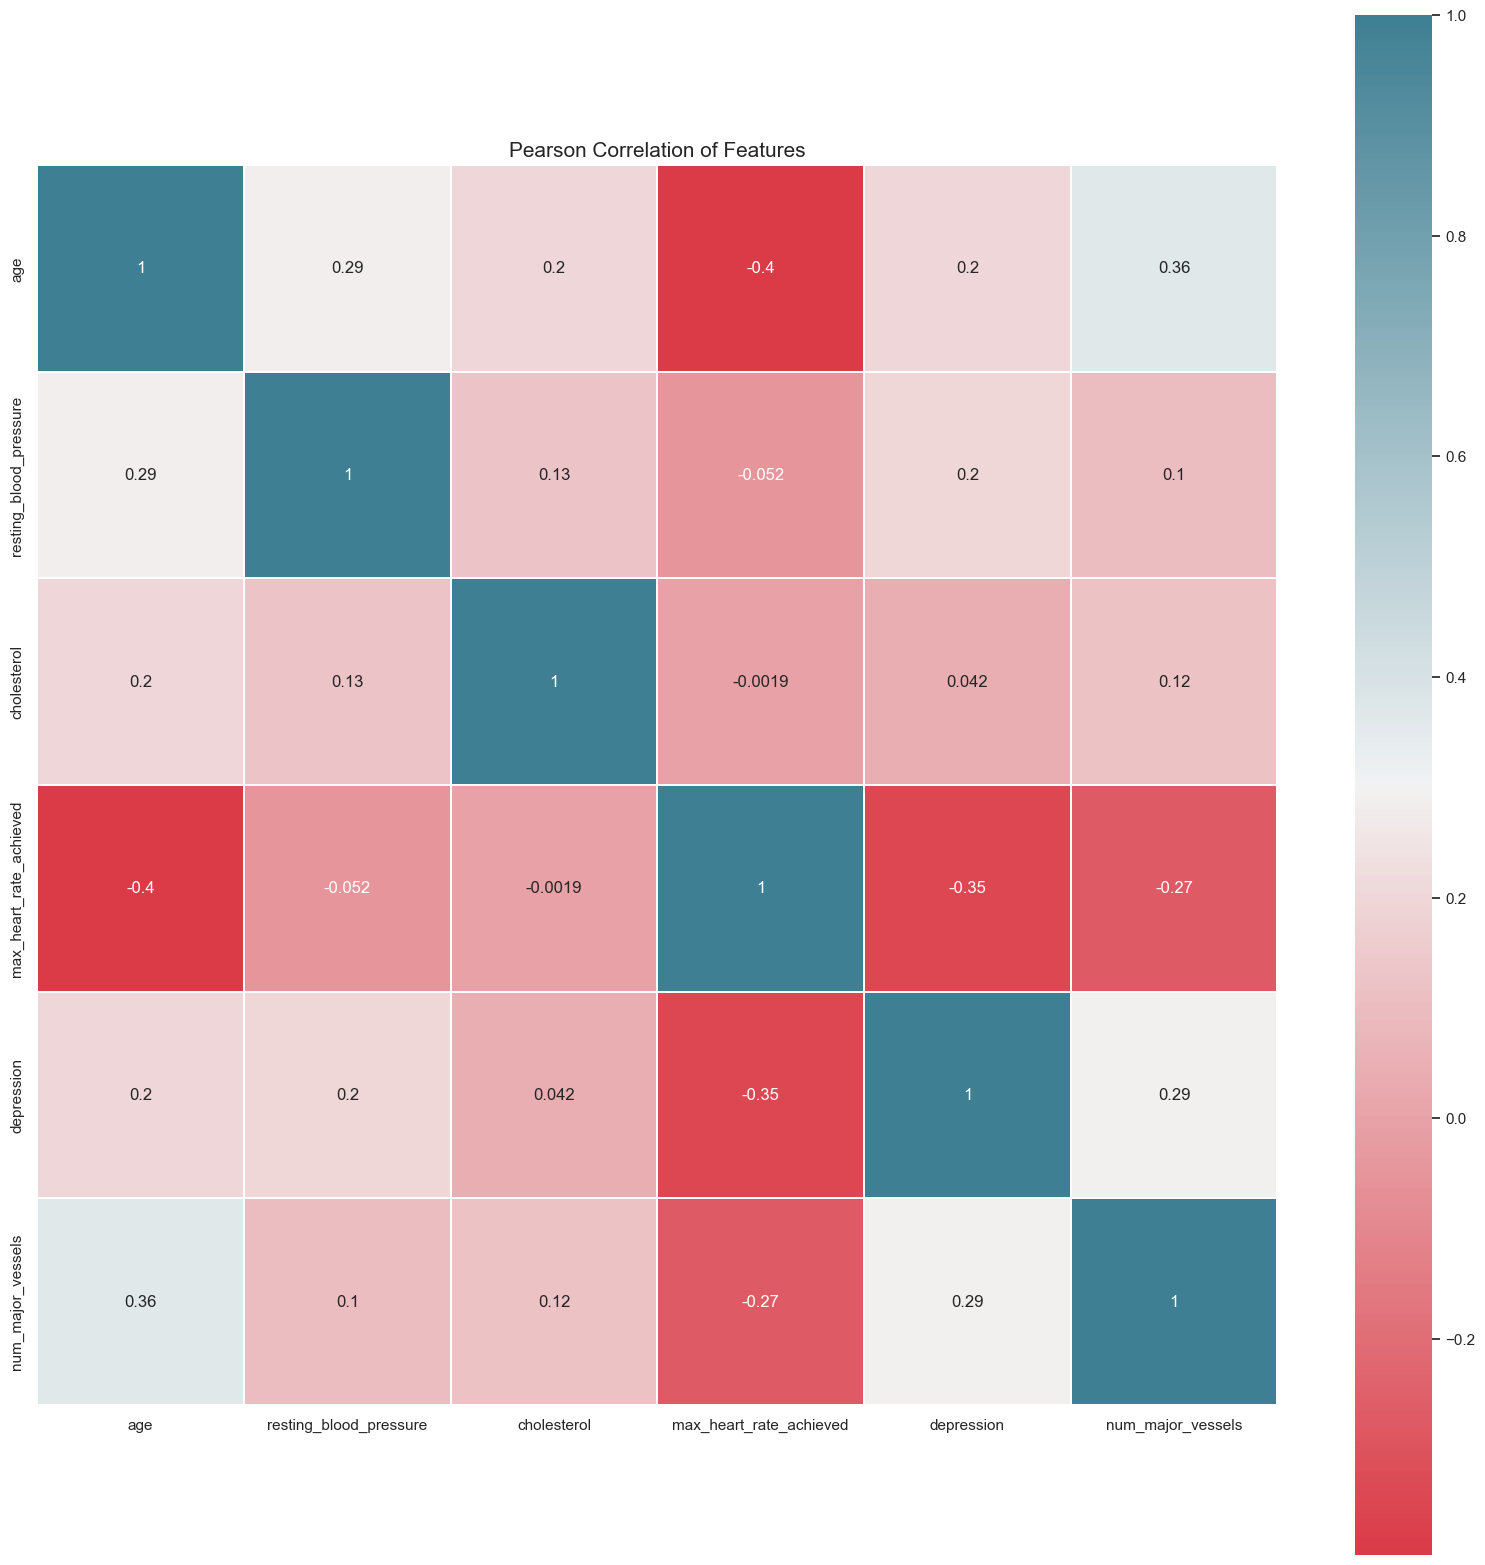

In [27]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features',size=15)
colormap=sns.diverging_palette(10,220,as_cmap=True)
sns.heatmap(df.corr(),
           cmap=colormap,
           square=True,
           annot=True,
           linewidths=0.1,vmax=1.0,linecolor='white',
           annot_kws={'fontsize':12})
plt.show()

# 2. EDA Summary
 

* heart rate is maximum in lower age group and minimum in higher age group.
* from the age group 40 to 54, there are more number of data with heart disease
* people with typical angina type of chest pain are less commonly found to have heart disease
* Females are more commonly suffered from heart disease than that of male.
* People with downsloping st_slope are more commonly found to be having heart disease.
* more number of cases of heart disease are of normal thalassemia.
* People with no exercise induced angina are more coomly found to be having heart disease.